## Lab | End to End : SQL query & Data Wrangling in Python & Visualise in Python or Tableau



**Installing pymysql & sqlalchemy**

In [3]:
conda install -c anaconda pymysql

Solving environment: done

## Package Plan ##

  environment location: /Users/josephinebiedermann/opt/anaconda3

  added / updated specs:
    - pymysql


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.0               |   py38hecd8cb5_0         2.9 MB
    pymysql-0.10.1             |           py38_0          82 KB  anaconda
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be INSTALLED:

  pymysql            anaconda/osx-64::pymysql-0.10.1-py38_0

The following packages will be UPDATED:

  conda                                4.9.2-py38hecd8cb5_0 --> 4.10.0-py38hecd8cb5_0



conda-4.10.0         | 2.9 MB    | ##################################### | 100% 
pymysql-0.10.1       | 82 KB     | ##################################### | 100% 
Preparing transaction: done
Ver

In [4]:
conda install -c anaconda sqlalchemy

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


**importing pymysql & sqlalchemy**

In [5]:
import pymysql 
from sqlalchemy import create_engine 
import pandas as pd 

In [6]:
import getpass
password = getpass.getpass()

········


## Challenge 1 - Load and evaluatue Dataset(s)
Load Dataset

In [10]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'

In [11]:
engine = create_engine(connection_string)

In [58]:
penelope = pd.read_sql_query('SELECT a.first_name, a.last_name, c.name as category_name, count(f.film_id) as no_of_films FROM sakila.actor as a JOIN sakila.film_actor as fa ON a.actor_id = fa.actor_id JOIN sakila.film as f ON fa.film_id = f.film_id JOIN sakila.film_category as fc ON f.film_id = fc.film_id JOIN sakila.category as c ON fc.category_id = c.category_id WHERE a.last_name = "GUINESS" and a.first_name = "PENELOPE" GROUP BY category_name ORDER BY no_of_films', engine)

In [56]:
nick = pd.read_sql_query('SELECT a.first_name, a.last_name, c.name as category_name, count(f.film_id) as no_of_films FROM sakila.actor as a JOIN sakila.film_actor as fa ON a.actor_id = fa.actor_id JOIN sakila.film as f ON fa.film_id = f.film_id JOIN sakila.film_category as fc ON f.film_id = fc.film_id JOIN sakila.category as c ON fc.category_id = c.category_id WHERE a.last_name = "WAHLBERG" and a.first_name = "NICK" GROUP BY category_name ORDER BY no_of_films', engine )

Evaluate Dataset

In [121]:
pd.set_option('display.max_rows',5)

In [131]:
nick

,first_name,last_name,category_name,no_of_films
0,NICK,WAHLBERG,Documentary,1
1,NICK,WAHLBERG,Action,1
...,...,...,...,...
12,NICK,WAHLBERG,Family,4
13,NICK,WAHLBERG,New,4


In [130]:
nick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   first_name     14 non-null     object
 1   last_name      14 non-null     object
 2   category_name  14 non-null     object
 3   no_of_films    14 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 576.0+ bytes


In [118]:
penelope

,first_name,last_name,category_name,no_of_films
0,PENELOPE,GUINESS,Documentary,1
1,PENELOPE,GUINESS,Animation,1
...,...,...,...,...
11,PENELOPE,GUINESS,Family,2
12,PENELOPE,GUINESS,Horror,3


In [132]:
penelope.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   first_name     13 non-null     object
 1   last_name      13 non-null     object
 2   category_name  13 non-null     object
 3   no_of_films    13 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 544.0+ bytes


Merging the dataframes

In [122]:
datam = pd.concat([nick,penelope], axis=0)
datam

,first_name,last_name,category_name,no_of_films
0,NICK,WAHLBERG,Documentary,1
1,NICK,WAHLBERG,Action,1
...,...,...,...,...
11,PENELOPE,GUINESS,Family,2
12,PENELOPE,GUINESS,Horror,3


merging first and last name in 1 new column

In [123]:
datam['full_name'] = datam['first_name'] + " " + datam['last_name']
datam

,first_name,last_name,category_name,no_of_films,full_name
0,NICK,WAHLBERG,Documentary,1,NICK WAHLBERG
1,NICK,WAHLBERG,Action,1,NICK WAHLBERG
...,...,...,...,...,...
11,PENELOPE,GUINESS,Family,2,PENELOPE GUINESS
12,PENELOPE,GUINESS,Horror,3,PENELOPE GUINESS


rearranging columns

In [124]:
cols = list(datam.columns.values)
cols

['first_name', 'last_name', 'category_name', 'no_of_films', 'full_name']

In [125]:
datam = datam[['full_name','first_name', 'last_name', 'category_name', 'no_of_films']]
datam

,full_name,first_name,last_name,category_name,no_of_films
0,NICK WAHLBERG,NICK,WAHLBERG,Documentary,1
1,NICK WAHLBERG,NICK,WAHLBERG,Action,1
...,...,...,...,...,...
11,PENELOPE GUINESS,PENELOPE,GUINESS,Family,2
12,PENELOPE GUINESS,PENELOPE,GUINESS,Horror,3


dropping first and last name column

In [126]:
datam = datam.drop(['first_name'], axis=1)
datam

,full_name,last_name,category_name,no_of_films
0,NICK WAHLBERG,WAHLBERG,Documentary,1
1,NICK WAHLBERG,WAHLBERG,Action,1
...,...,...,...,...
11,PENELOPE GUINESS,GUINESS,Family,2
12,PENELOPE GUINESS,GUINESS,Horror,3


In [127]:
datam = datam.drop(['last_name'], axis=1)

In [128]:
datam.head()

,full_name,category_name,no_of_films
0,NICK WAHLBERG,Documentary,1
1,NICK WAHLBERG,Action,1
2,NICK WAHLBERG,Animation,1
3,NICK WAHLBERG,Children,1
4,NICK WAHLBERG,Music,1


Resetting the index

In [129]:
datam = datam.reset_index(drop=True)
datam

,full_name,category_name,no_of_films
0,NICK WAHLBERG,Documentary,1
1,NICK WAHLBERG,Action,1
...,...,...,...
25,PENELOPE GUINESS,Family,2
26,PENELOPE GUINESS,Horror,3


## Challenge 2 - Export your data frame as a csv 



In [80]:
datam.to_csv('LAB_SQL_Day5_datam.csv')

## Challenge 3: Visualise relationships found in the data


Questions:<br>

1. In which type of movie is Penelope Guiness seen most often?<br>
2. Which actor played in more movies?<br>
3. Is on of the actors featured more in a certain film category then the other?<br>

In [24]:
import matplotlib.pyplot as plt 
import seaborn as sns 

**1. In which type of movie is Penelope Guiness seen most often?<br>**

- Penelope was featured most often in horror movies
- Nicks most features categories are new and family

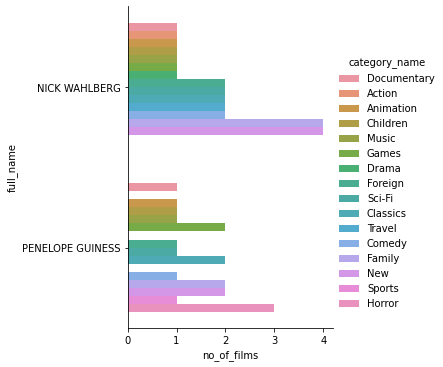

In [109]:
sns.catplot(x="no_of_films", y="full_name", hue="category_name", kind="bar", data=datam)

**2. Which actor played in more movies?<br>**

- Overall Nick plays in more movies then Penelope
- the difference is however by only 1 movie

<AxesSubplot:xlabel='full_name', ylabel='count'>

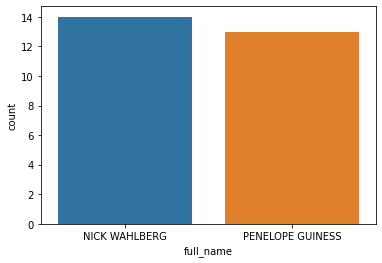

In [103]:
sns.countplot(x='full_name', data = datam)

**3. Is on of the actors featured more in a certain film category then the other?<br>**

- yes Nick is features in more movies within the categories: foreign, sci-fi, comedy, family and new
- where as in games penelope is features more often
- There are also categories in which only of the actors is solemly present

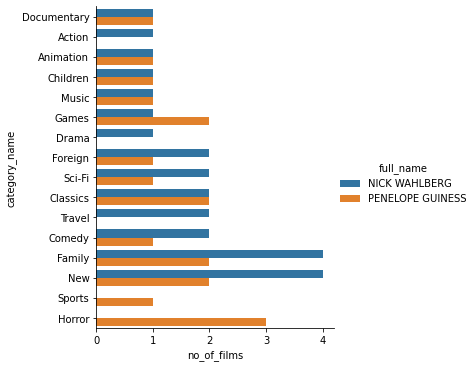

In [92]:
sns.catplot(x="no_of_films", y="category_name", hue="full_name", kind="bar", data=datam)